## Exploring Physionet 2016 Dataset

In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
physio16_path = '/Users/donu/Desktop/S25/ELEC 594/datasets/physio16/'
physio_anno_path = physio16_path +'annotations/Online_Appendix_training_set.csv'

In [3]:
physio16_data  = pd.read_csv(physio_anno_path)
num_recordings = physio16_data.shape[0]

In [4]:
physio16_data.head(20)

,Challenge record name,Database,Original record name,Diagnosis,Class (-1=normal 1=abnormal),# Beat (automated algorithm),# Beats requiring hand correction,Gender,Age (year),Height (m),...,# Recording in each subject,Transducer site on body,Recording state,Murmurs (2=None 3=Weak 4=Strong 6=Unclear),"Murmur Location (2=Sys,3=Dia,4=Both)",Arrhythmia (2=None 3=One arrhythmic beat 4=Medium Arrhytmia 5=Severe Arrhytmia 6=Unclear 7=Two arrhythmic beats),Respiration noise (2=None 3=Insignificant 4=Weak Resp. Noise<2 s 5=Weak Resp. Noise<3 s 6=Weak Resp. Noise <4 s 7=Weak Resp. Noise >4 s 8=Powerfull Resp. Noise<2 s 9=Powerfull Resp. Noise<3 s 10=Powerfull Resp. noise <4 s 11=Powerfull Resp. Noise >4 s 12=Dont know 13=Weak Resp. Noise<1 s 14=Resp. Noise<1 s 15=Powerfull Resp. noise <1 s 16=Weak Rec. Noise<1 s 17=Powerfull Rec. Noise<1 s),Ambient noise (2=None 3=Insignificant 4=Weak Rec. BG<2 s 5=Weak Rec. BG<3 s 6=Weak Rec. BG <4 s 7=Weak Rec. BG >4 s 8=BG. Noise<2 s 9=BG. Noise<3 s 10= BG. noise <4 s 11=BG. Noise >4 s 12=Powerfull BG. Noise<2 s 13=Powerfull BG. Noise<3 s 14=Powerfull BG. noise <4 s 15=Powerfull BG. Noise >4 s 16=Dont know 17=Weak BG. Noise<1 s 18=BG.Noise<1 s 19=Powerfull BG. Noise<1 s),Recording noise (2=None 3=Insignificant 4=Beg. Rec. Noise 5=End Rec. Noise 6=Beg-End Reco Noise 7=Weak Rec. Noise<2 s 8=Weak Rec. Noise<3 s 9=Weak Rec. Noise <4 s 10=Weak Rec. Noise >4 s 11=Powerfull Rec. Noise<2 s 12=Powerfull Rec. Noise<3 s 13=Powerfull Rec. noise <4 s 14=Powerfull Rec. Noise >4 s 15=Spikes 16=Dont know 17=Weak Rec. Noise<1 s 18=Powerfull Rec. Noise<1 s),Abdominal sounds (2=None 3=Insignificant 4=Sto. Noise<2 s 5=Sto. Noise<3 s 6=Sto. Noise <4 s 7=Sto. Noise >4 s 8=Dont know 9=Sto. Noise<1 s)
0,a0001,training-a,C45S1,MVP,1,36,0,NaN,NaN,NaN,...,NaN,Left of parasternum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a0002,training-a,C19S3,MVP,1,27,7,NaN,NaN,NaN,...,NaN,Parasternum when sit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a0003,training-a,C23S0,MVP,1,25,0,NaN,NaN,NaN,...,NaN,Left of parasternum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a0004,training-a,C35S18,Benign,1,35,0,NaN,NaN,NaN,...,NaN,Left of parasternum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a0005,training-a,C63S20,Benign,1,52,0,NaN,NaN,NaN,...,NaN,Parasternum when squat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,a0006,training-a,C12S4,AD,1,27,27,NaN,NaN,NaN,...,NaN,2nd right intercostal space,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,a0007,training-a,C37S2,Normal,-1,52,27,NaN,NaN,NaN,...,NaN,Parasternum when sit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,a0008,training-a,C73S1,MVP,1,51,51,NaN,NaN,NaN,...,NaN,Left of apex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,a0009,training-a,C63S12,Normal,-1,46,0,NaN,NaN,NaN,...,NaN,Parasternum when squat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,a0010,training-a,C31S4,Benign,1,44,0,NaN,NaN,NaN,...,NaN,Parasternum when squat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
physio16_data.columns

Index(['Challenge record name', 'Database', 'Original record name',
       'Diagnosis', 'Class (-1=normal 1=abnormal)',
       '# Beat (automated algorithm)', '# Beats requiring hand correction',
       'Gender', 'Age (year)', 'Height (m)', 'Weight (kg)', 'BMI', 'Smoker',
       'Degree of disease', 'Subject ID', '# Raw record',
       '# Recording in each subject', 'Transducer site on body',
       'Recording state', 'Murmurs (2=None 3=Weak 4=Strong 6=Unclear)',
       'Murmur Location (2=Sys,3=Dia,4=Both)',
       'Arrhythmia (2=None 3=One arrhythmic beat 4=Medium Arrhytmia 5=Severe Arrhytmia 6=Unclear 7=Two arrhythmic beats)',
       'Respiration noise (2=None 3=Insignificant 4=Weak Resp. Noise<2 s 5=Weak Resp. Noise<3 s 6=Weak Resp. Noise <4 s 7=Weak Resp. Noise >4 s 8=Powerfull Resp. Noise<2 s 9=Powerfull Resp. Noise<3 s 10=Powerfull Resp. noise <4 s  11=Powerfull Resp. Noise >4 s 12=Dont know 13=Weak Resp. Noise<1 s 14=Resp. Noise<1 s 15=Powerfull Resp. noise <1 s 16=Weak Rec. No

### 1 - Data exploration

### 1.a - Find murmurs

In [6]:
normal_str = "Class (-1=normal 1=abnormal)"
murmur_str = "Murmurs (2=None 3=Weak 4=Strong 6=Unclear)"

In [7]:
type(np.unique(physio16_data[murmur_str])[-1])

numpy.float64

In [8]:
np.sum(~pd.isna(physio16_data[murmur_str]))
# murmur information is present

490

In [9]:
physio16_data.shape

(3153, 26)

In [10]:
np.sum(physio16_data[normal_str]==1) # 665 abnormal

665

In [11]:
100*np.sum(physio16_data[normal_str]==1)/3153 # percent abnormal

21.091024421186173

In [12]:
just_murmurs = physio16_data.loc[~pd.isna(physio16_data[murmur_str])] # where murmurs are

In [13]:
np.sum(just_murmurs[normal_str]==1)/np.sum(just_murmurs[normal_str]!=0)

0.21224489795918366

In [14]:
physio16_data['Database'].unique() # physio16_path+this value+ 'Challenge record name' value

array(['training-a', 'training-b', 'training-c', 'training-d',
       'training-e', 'training-f'], dtype=object)

In [15]:
murmur_str # this tells you what the numbers mean. want to find where murmurs are

'Murmurs (2=None 3=Weak 4=Strong 6=Unclear)'

In [16]:
murmur_locs = physio16_data[murmur_str]>2 # !impt: >=1 vs >=0. a lot are just 0

In [17]:
sum(physio16_data[murmur_str]>2) # 2=none, 3=weak, 4=strong

78

In [18]:
np.sum(murmur_locs)

78

In [19]:
murmur_present = physio16_data.loc[murmur_locs] # there are definitely murmurs in these recordings
murmur_present = murmur_present.reset_index()
murmur_count = murmur_present.shape[0]

In [20]:
# proportion of murmur recordings that are associated with abnormal heartbeats
np.sum(murmur_present[normal_str]==1)/np.sum(murmur_present[normal_str]!=0)
# !impt: if >=1 was used this will be 1. otherwise it will be like 0.2 

1.0

### 1.b - Find normal recordings

In [21]:
normal_recordings = physio16_data[~murmur_locs] # any of these
normal_recordings.reset_index().head(20)

,index,Challenge record name,Database,Original record name,Diagnosis,Class (-1=normal 1=abnormal),# Beat (automated algorithm),# Beats requiring hand correction,Gender,Age (year),...,# Recording in each subject,Transducer site on body,Recording state,Murmurs (2=None 3=Weak 4=Strong 6=Unclear),"Murmur Location (2=Sys,3=Dia,4=Both)",Arrhythmia (2=None 3=One arrhythmic beat 4=Medium Arrhytmia 5=Severe Arrhytmia 6=Unclear 7=Two arrhythmic beats),Respiration noise (2=None 3=Insignificant 4=Weak Resp. Noise<2 s 5=Weak Resp. Noise<3 s 6=Weak Resp. Noise <4 s 7=Weak Resp. Noise >4 s 8=Powerfull Resp. Noise<2 s 9=Powerfull Resp. Noise<3 s 10=Powerfull Resp. noise <4 s 11=Powerfull Resp. Noise >4 s 12=Dont know 13=Weak Resp. Noise<1 s 14=Resp. Noise<1 s 15=Powerfull Resp. noise <1 s 16=Weak Rec. Noise<1 s 17=Powerfull Rec. Noise<1 s),Ambient noise (2=None 3=Insignificant 4=Weak Rec. BG<2 s 5=Weak Rec. BG<3 s 6=Weak Rec. BG <4 s 7=Weak Rec. BG >4 s 8=BG. Noise<2 s 9=BG. Noise<3 s 10= BG. noise <4 s 11=BG. Noise >4 s 12=Powerfull BG. Noise<2 s 13=Powerfull BG. Noise<3 s 14=Powerfull BG. noise <4 s 15=Powerfull BG. Noise >4 s 16=Dont know 17=Weak BG. Noise<1 s 18=BG.Noise<1 s 19=Powerfull BG. Noise<1 s),Recording noise (2=None 3=Insignificant 4=Beg. Rec. Noise 5=End Rec. Noise 6=Beg-End Reco Noise 7=Weak Rec. Noise<2 s 8=Weak Rec. Noise<3 s 9=Weak Rec. Noise <4 s 10=Weak Rec. Noise >4 s 11=Powerfull Rec. Noise<2 s 12=Powerfull Rec. Noise<3 s 13=Powerfull Rec. noise <4 s 14=Powerfull Rec. Noise >4 s 15=Spikes 16=Dont know 17=Weak Rec. Noise<1 s 18=Powerfull Rec. Noise<1 s),Abdominal sounds (2=None 3=Insignificant 4=Sto. Noise<2 s 5=Sto. Noise<3 s 6=Sto. Noise <4 s 7=Sto. Noise >4 s 8=Dont know 9=Sto. Noise<1 s)
0,0,a0001,training-a,C45S1,MVP,1,36,0,NaN,NaN,...,NaN,Left of parasternum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,a0002,training-a,C19S3,MVP,1,27,7,NaN,NaN,...,NaN,Parasternum when sit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,a0003,training-a,C23S0,MVP,1,25,0,NaN,NaN,...,NaN,Left of parasternum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,a0004,training-a,C35S18,Benign,1,35,0,NaN,NaN,...,NaN,Left of parasternum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,a0005,training-a,C63S20,Benign,1,52,0,NaN,NaN,...,NaN,Parasternum when squat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,a0006,training-a,C12S4,AD,1,27,27,NaN,NaN,...,NaN,2nd right intercostal space,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,a0007,training-a,C37S2,Normal,-1,52,27,NaN,NaN,...,NaN,Parasternum when sit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,a0008,training-a,C73S1,MVP,1,51,51,NaN,NaN,...,NaN,Left of apex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,a0009,training-a,C63S12,Normal,-1,46,0,NaN,NaN,...,NaN,Parasternum when squat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,a0010,training-a,C31S4,Benign,1,44,0,NaN,NaN,...,NaN,Parasternum when squat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.c Select good examples for both murmur and non-murmur

In [22]:
# want like, 3 good murmur and non-murmur recordings for visualization purposes
# visualization here

# from the other ipynb
def load_from_filepath(filepath):
    """
    Load an audio file from a given file path and return the audio data and sample rate.
    """
    audio_data, sample_rate = librosa.load(filepath,sr=None)
    return audio_data, sample_rate


In [23]:
murmur_present.shape

(78, 27)

training-b/b0008
training-b/b0016
training-b/b0018


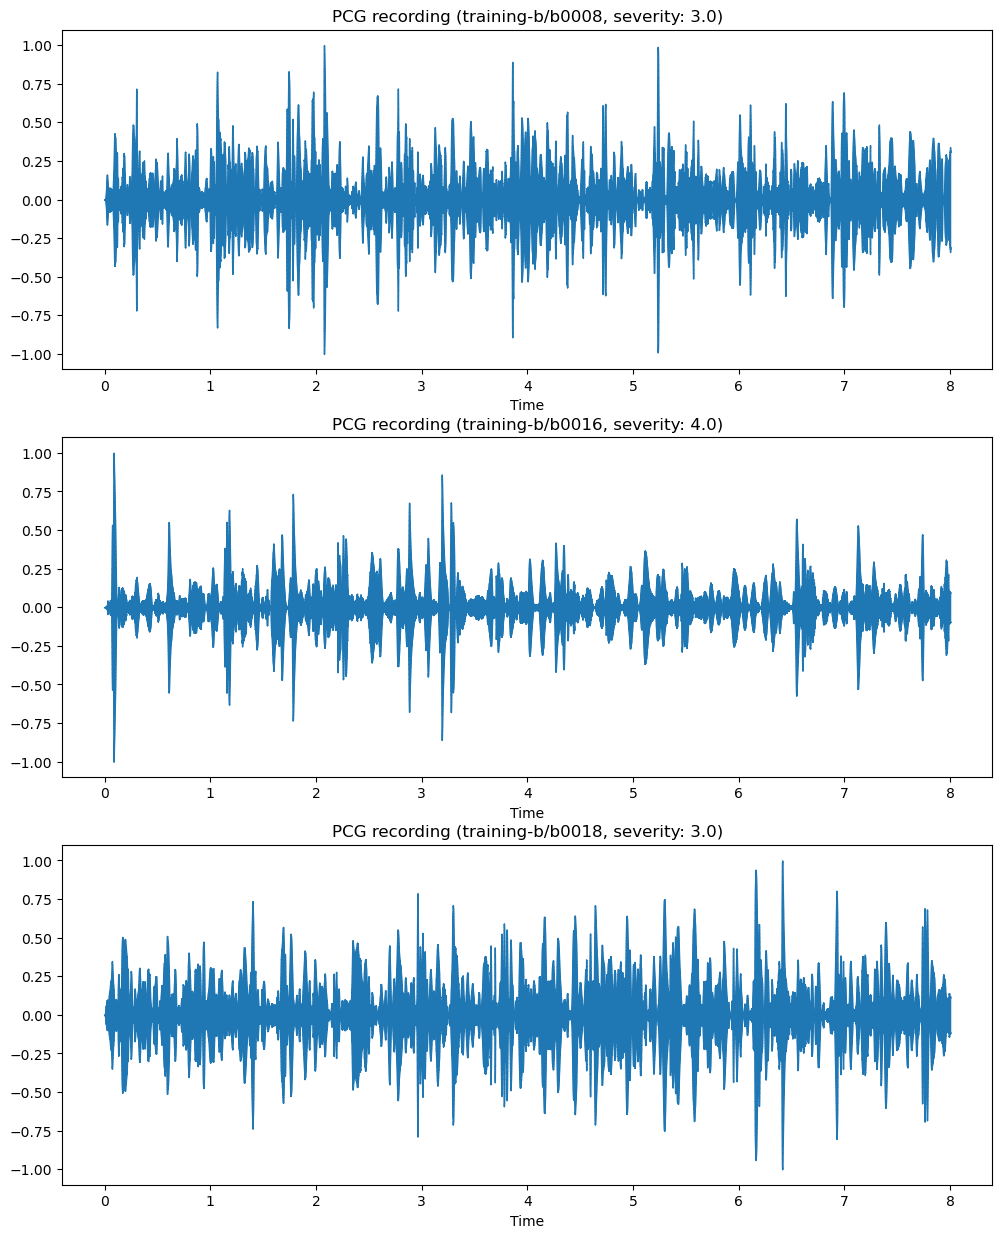

In [24]:
# looking for clean recordings
# change between "murmur_present" and "normal_recordings" to see murmured vs normal recordings
num_to_show = 3
start_idx = 0
fig, ax = plt.subplots(nrows=num_to_show, figsize=(12, 5*num_to_show))

#general plotting
for rowidx,row in murmur_present.iterrows():
  if start_idx<=rowidx<start_idx+num_to_show:
    relidx = rowidx-start_idx
    fname = murmur_present.iloc[rowidx]['Challenge record name']
    subdir =  murmur_present.iloc[rowidx]['Database']
    fpath = physio16_path+f'{subdir}/{fname}.wav'
    print(subdir + '/'+ fname)
    data, sr = load_from_filepath(fpath)
    severity = murmur_present.iloc[rowidx][murmur_str]
    ax[relidx].set(title=f'PCG recording ({subdir+"/"+fname}, severity: {severity})')
    #ax[1].set(title='PCG+Noise')
    librosa.display.waveshow(data,sr=sr,ax=ax[relidx])
    #librosa.display.waveshow(composite,sr=target_freq,ax=ax[1])

# !impt: strange behavior here. plotting w/ waveshow generally has a range in [-1,1]
# ... however, if you take the max of the actual wav file it can be like 0.7
# ... i was concerned since the zoomed in waveforms don't match the regular waveforms
# ... but the regular waveforms dont even match the regular data bruh

### Code to print zoomed in versions:
#print('---')
#fig, ax = plt.subplots(nrows=num_to_show, figsize=(12, 5*num_to_show))
## # want to show the same length for all of them actually. 3 seconds. 
#good_idx = 0
#for rowidx,row in murmur_present.iloc[start_idx:,:].iterrows():
#  if num_to_show<=good_idx: 
#    break
#  # recording name and type
#  fname = murmur_present.iloc[rowidx]['Challenge record name']
#  subdir =  murmur_present.iloc[rowidx]['Database']
#  fpath = physio16_path+f'{subdir}/{fname}.wav'
#  # load the data
#  data, sr = load_from_filepath(fpath)
#  length_of_rec = len(data)/sr
#  # want to plot the same length for all recordings
#  if length_of_rec<=3: 
#    continue
#  # good to plot
#  print(subdir+'/'+fname, "(murmur)")
#  #print(max(data))
#  ax[good_idx].set(title=f'PCG recording, zoomed in ({subdir+"/"+fname})')
#  #ax[1].set(title='PCG+Noise')
#  librosa.display.waveshow(data[:sr*3],sr=sr,ax=ax[good_idx]) # original data
#  good_idx+=1
  
# i have looked at 74 murmured heartbeats and they are all barely interpretable to me...

In [25]:
# Q: 
# # Why is it that all of these recordings are so noisy seeming/ is this a realistic level of noise?
# # Does this problem go away when plotting with scipy? Let's confirm...

In [26]:
normal_recordings.shape

(3075, 26)

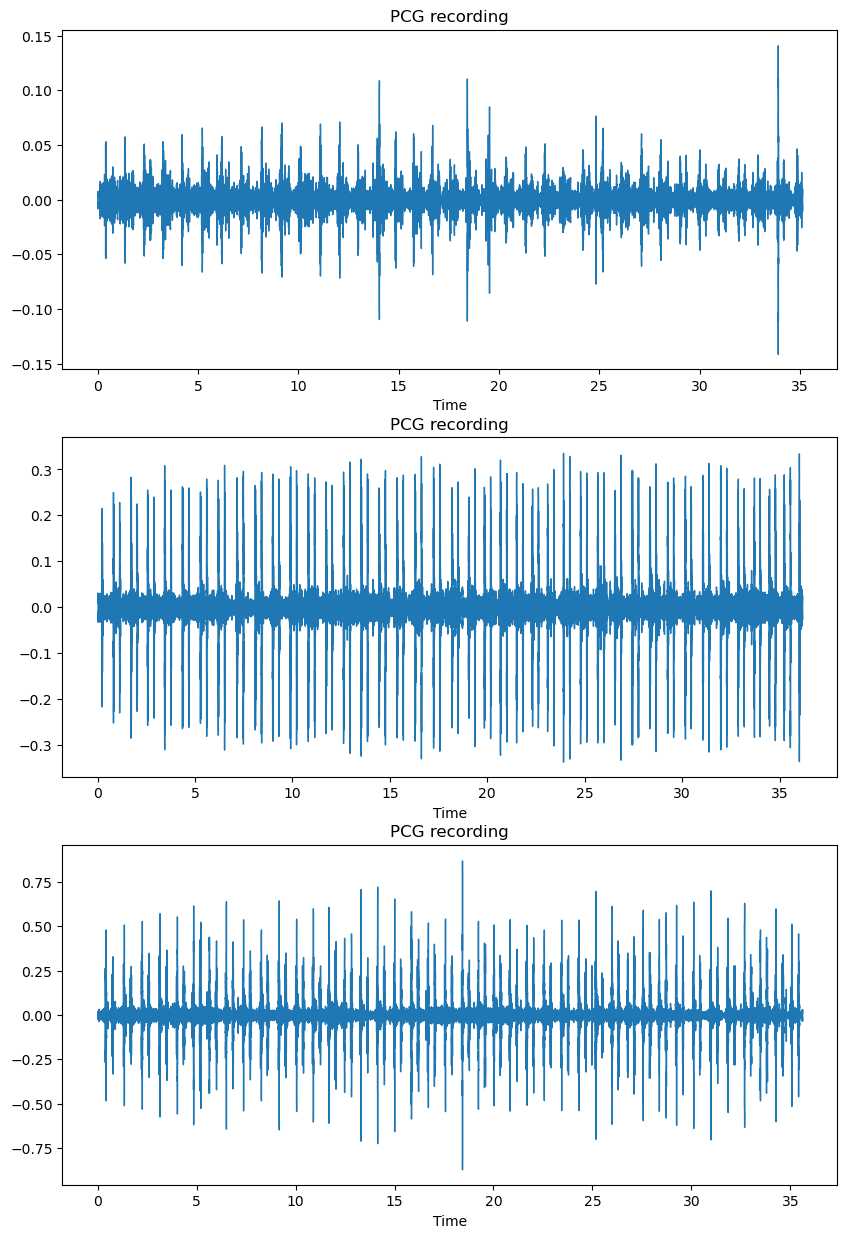

In [27]:
# Plotting with scipy
how_many_to_show=3
what_idx_to_start =40
fig, ax = plt.subplots(nrows=how_many_to_show, figsize=(10, 5*how_many_to_show))

for rowidx,row in normal_recordings.iterrows():
  if what_idx_to_start<=rowidx<what_idx_to_start+how_many_to_show:
    relidx = rowidx-what_idx_to_start
    fname = normal_recordings.iloc[rowidx]['Challenge record name']
    subdir =  normal_recordings.iloc[rowidx]['Database']
    fpath = physio16_path+f'/{subdir}/{fname}.wav'
    data, sr = load_from_filepath(fpath)
    ax[relidx].set(title='PCG recording')
    #ax[1].set(title='PCG+Noise')
    librosa.display.waveshow(data,sr=sr,ax=ax[relidx])
    #librosa.display.waveshow(composite,sr=target_freq,ax=ax[1])
# these generally look much better. 
# thinking about what examples can be used...

In [28]:
# what now: 
# 0. make the clips shorter. s1 vs s2 should be good. 
# 0.5. once you do that look for the best exemplars from murmured heartbeats (murmur should be visible
# ... and also non-murmured)
# 1. move them to the other ipynb as a part of the pipeline.abs
# 1.5. want quantitative results
# 2. move them to

### 1.d - Find noisy recordings

In [29]:
respiration_str = "Respiration noise (2=None 3=Insignificant 4=Weak Resp. Noise<2 s 5=Weak Resp. Noise<3 s 6=Weak Resp. Noise <4 s 7=Weak Resp. Noise >4 s 8=Powerfull Resp. Noise<2 s 9=Powerfull Resp. Noise<3 s 10=Powerfull Resp. noise <4 s  11=Powerfull Resp. Noise >4 s 12=Dont know 13=Weak Resp. Noise<1 s 14=Resp. Noise<1 s 15=Powerfull Resp. noise <1 s 16=Weak Rec. Noise<1 s 17=Powerfull Rec. Noise<1 s)"
ambient_str = "Ambient noise (2=None 3=Insignificant 4=Weak Rec. BG<2 s 5=Weak Rec. BG<3 s 6=Weak Rec. BG <4 s 7=Weak Rec. BG >4 s 8=BG. Noise<2 s 9=BG. Noise<3 s 10= BG. noise <4 s 11=BG. Noise >4 s 12=Powerfull BG. Noise<2 s 13=Powerfull BG. Noise<3 s 14=Powerfull BG. noise <4 s  15=Powerfull BG. Noise >4 s 16=Dont know 17=Weak BG. Noise<1 s  18=BG.Noise<1 s 19=Powerfull BG. Noise<1 s)"
noise_str = "Recording noise (2=None 3=Insignificant 4=Beg. Rec. Noise 5=End Rec. Noise 6=Beg-End Reco Noise 7=Weak Rec. Noise<2 s 8=Weak Rec. Noise<3 s 9=Weak Rec. Noise <4 s 10=Weak Rec. Noise >4 s 11=Powerfull Rec. Noise<2 s 12=Powerfull Rec. Noise<3 s 13=Powerfull Rec. noise <4 s 14=Powerfull Rec. Noise >4 s 15=Spikes 16=Dont know 17=Weak Rec. Noise<1 s 18=Powerfull Rec. Noise<1 s)"
abdominal_str = "Abdominal sounds (2=None 3=Insignificant 4=Sto. Noise<2 s 5=Sto. Noise<3 s 6=Sto. Noise <4 s 7=Sto. Noise >4 s 8=Dont know 9=Sto. Noise<1 s)"

In [30]:
noise_data_present = physio16_data.loc[~pd.isna(physio16_data[respiration_str])
                                 |~pd.isna(physio16_data[ambient_str])
                                 |~pd.isna(physio16_data[noise_str])
                                 |~pd.isna(physio16_data[abdominal_str])]

In [31]:
noise_data_present.shape

(490, 26)

In [32]:
noise_data_present.loc

In [33]:
noticeable_noise = noise_data_present.loc[(noise_data_present[respiration_str]>3) 
                       | (noise_data_present[ambient_str]>3)
                        | (noise_data_present[noise_str]>3)
                        | (noise_data_present[abdominal_str]>3)]
# so getting rid of 353 recordings

In [34]:
noticeable_noise.shape

(353, 26)

### 1.e - Reading Signal Quality Annotations

In [35]:
training_a_sqi = physio16_path+'training-a/REFERENCE-SQI.csv'
training_a_sqi_data = pd.read_csv(training_a_sqi)
training_b_sqi = physio16_path+'training-b/REFERENCE-SQI.csv'
training_b_sqi_data = pd.read_csv(training_b_sqi)
training_c_sqi = physio16_path+'training-c/REFERENCE-SQI.csv'
training_c_sqi_data = pd.read_csv(training_c_sqi)
training_d_sqi = physio16_path+'training-d/REFERENCE-SQI.csv'
training_d_sqi_data = pd.read_csv(training_d_sqi)
training_e_sqi = physio16_path+'training-e/REFERENCE-SQI.csv'
training_e_sqi_data = pd.read_csv(training_e_sqi)
training_f_sqi = physio16_path+'training-f/REFERENCE-SQI.csv'
training_f_sqi_data = pd.read_csv(training_f_sqi)

In [49]:
training_a_sqi_data.head(5)

,a0001,1,1.1
0,a0002,1,1
1,a0003,1,1
2,a0004,1,1
3,a0005,1,1
4,a0006,1,0


In [37]:
a_low_quality = np.sum(training_a_sqi_data['1.1']<1)
a_low_quality

17

In [48]:
training_b_sqi_data.head(5)

,b0001,-1,1
0,b0002,-1,1
1,b0003,-1,1
2,b0004,-1,1
3,b0005,-1,1
4,b0006,-1,1


In [39]:
b_low_quality = np.sum(training_b_sqi_data['1']<1)
b_low_quality

122

In [40]:
training_c_sqi_data.head(5)

,c0001,1,1.1
0,c0002,1,1
1,c0003,-1,1
2,c0004,1,1
3,c0005,1,0
4,c0006,-1,1


In [41]:
c_low_quality = np.sum(training_c_sqi_data['1.1']<1)
c_low_quality

4

In [50]:
training_d_sqi_data.head(5)

,d0001,-1,1
0,d0002,1,1
1,d0003,1,1
2,d0004,1,1
3,d0005,-1,1
4,d0006,-1,1


In [43]:
d_low_quality = np.sum(training_d_sqi_data['1']<1)
d_low_quality

3

In [51]:
training_e_sqi_data.head(5)

,e00001,-1,0
0,e00002,-1,1
1,e00003,-1,1
2,e00004,-1,1
3,e00005,-1,1
4,e00006,-1,1


In [45]:
e_low_quality = np.sum(training_e_sqi_data['0']<1)
e_low_quality

212

In [46]:
a_low_quality+b_low_quality+c_low_quality+d_low_quality+e_low_quality

358

In [47]:
# so, probably get rid of like ~500 recordings. these 358 and the ones from b with more than very slight noise